In [1]:
from DataLoader import DataLoader
from Utility import *

dataloader = DataLoader("data")
dataloader.load_paths("paths_finished.tsv") 
dataloader.load_edges("links.tsv") 

In [2]:
posterior_probs = compute_posteriors(dataloader.transitions, dataloader.edges)

In [3]:
posteriors = posterior_probs[["Current_A","Next_A","Goal_G","P_star"]].groupby(["Current_A","Next_A","Goal_G"]).sum()

In [4]:
path_specific_distances = compute_path_specific_distances(dataloader.paths, posteriors, dataloader.pagerank)

Processing Paths: 100%|██████████| 51317/51317 [01:46<00:00, 480.10it/s]


In [5]:
path_specific_distances

,start,goal,distance
0,14th_century,African_slave_trade,0.236158
1,Europe,African_slave_trade,0.098828
2,Africa,African_slave_trade,0.043848
3,Atlantic_slave_trade,African_slave_trade,0.017480
4,14th_century,African_slave_trade,0.608755
...,...,...,...
295447,Yarralumla%2C_Australian_Capital_Territory,Abraham_Lincoln,0.372886
295448,Australia,Abraham_Lincoln,0.192206
295449,United_States,Abraham_Lincoln,0.097247
295450,Ziad_Jarrah,Jew,0.480723


In [15]:
a = path_specific_distances[path_specific_distances["start"] == "Karl_Marx"]
b = a[a["goal"] == "Noam_Chomsky"]
b["distance"].mean()

np.float64(0.2509281637183849)

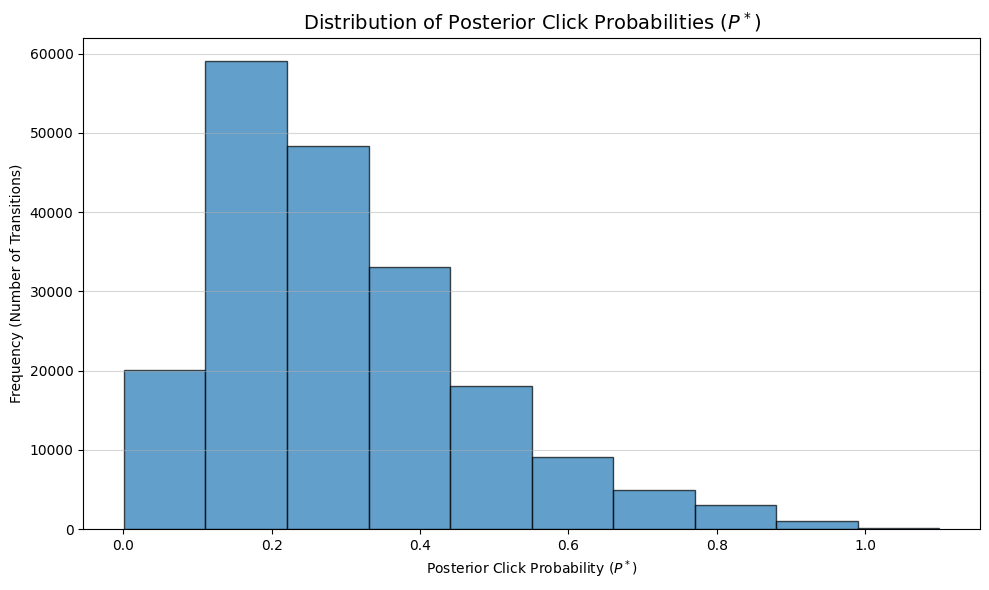

In [6]:
import matplotlib.pyplot as plt

# Filter out potential NaNs
p_star_data = posterior_probs['P_star'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(p_star_data, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Posterior Click Probabilities ($P^*$)', fontsize=14)
plt.xlabel('Posterior Click Probability ($P^*$)')
plt.ylabel('Frequency (Number of Transitions)')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()